In [ ]:
#!pip install git+https://github.com/christian-oreilly/spyndle.git

In [3]:
from spyndle.io import EDFReader
import os

path = "/home/oreilly/MASS"

reader = EDFReader(os.path.join(path, "01-02-0001 PSG.edf"), isSplitted=True, 
                   annotationFileName=[os.path.join(path, "01-02-0001 Base.edf"),
                                       os.path.join(path, "01-02-0001 SpindleE1.edf"),
                                       os.path.join(path, "01-02-0001 SpindleE2.edf"),
                                       os.path.join(path, "01-02-0001 KComplexesE1.edf"),
                                      ])

In [5]:
print(reader.events)

The list object contains 5324 members:
Sleep stage 1:77
Sleep stage 2:745
Sleep stage 3:105
Sleep stage 4:170
Sleep stage ?:33
Sleep stage R:242
Sleep stage W:47
kComplexE1:409
spindleE1:1044
spindleE2:2452



In [8]:
spindleE1 = [e for e in reader.events if e.name == "spindleE1"]
spindleE2 = [e for e in reader.events if e.name == "spindleE2"]
kcE1      = [e for e in reader.events if e.name == "kComplexE1"]

In [47]:
import numpy as np

def correct_channel_label(label):
    return label.split("-")[0] + "-CLE"

def plot_event(ax, event, padding = 1.0):
    start   = event.startTime
    end     = event.startTime + event.duration()
    channel = correct_channel_label(event.channel)
    data    = reader.read(signalNames  = [channel], 
                          startTime    = start - padding, 
                          timeDuration = event.duration() + 2.0*padding)

    t = np.linspace(start - padding,  
                    end   + padding, 
                    len(data[channel].signal))
    ax.plot(t, data[channel].signal)
    ax.plot(t[(t >= start)&(t < end)], data[channel].signal[(t >= start)&(t < end)])

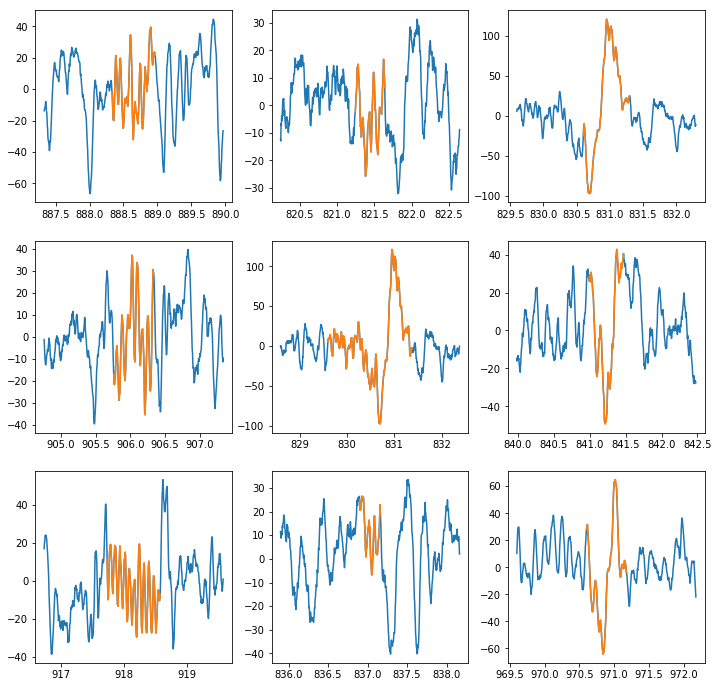

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for no_row, axes_row in enumerate(axes):
    for ax, event in zip(axes_row, [spindleE1[no_row], spindleE2[no_row], kcE1[no_row]]):
        plot_event(ax, event)
        
           